# PHD Stipends analysis

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [219]:
phddata_df = pd.read_csv("PHDstipends.csv")

In [220]:
phddata_df

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,University of Tennessee - Knoxville,Economics,"$1,850",0.09,2020-2021,1st,NaN,"$1,850",NaN,NaN,NaN
1,University of Arizona (U of A),Economics,"$21,000",1.01,2020-2021,1st,NaN,"$21,000",NaN,NaN,$10500 per semester. RA/TA required. Need to p...
2,University of Arizona (U of A),Economics,"$19,800",0.96,2020-2021,1st,NaN,"$21,000",NaN,"$1,200",NaN
3,University of Florida,ECE,"$22,600",NaN,2020-2021,1st,"$24,000",NaN,NaN,"$1,400",NaN
4,University of Virginia (UVA),ECE,"$26,000",1.14,2020-2021,1st,"$26,000",NaN,NaN,NaN,NaN
5,University of Wisconsin - Madison (UW),NaN,"$27,333",1.20,2020-2021,NaN,"$27,333",NaN,NaN,NaN,NaN
6,Washington University in St. Louis (Wash U),olin,"$35,000",1.69,2020-2021,1st,"$35,000",NaN,NaN,NaN,NaN
7,University of Tennessee - Knoxville,Economics,"$18,500",0.87,2020-2021,1st,NaN,"$18,500",NaN,NaN,NaN
8,New York University (NYU),Computer Science,"$32,851",1.10,2020-2021,1st,NaN,"$32,851",NaN,NaN,NaN
9,New York University (NYU),Sociology,"$33,500",1.13,2020-2021,1st,NaN,"$30,000","$3,500",NaN,NaN


## Exploring Data

In [221]:
phddata_df.shape
# phddata_df.index

(8707, 11)

In [222]:
phddata_df.dtypes

University         object
Department         object
Overall Pay        object
LW Ratio          float64
Academic Year      object
Program Year       object
12 M Gross Pay     object
9 M Gross Pay      object
3 M Gross Pay      object
Fees               object
Comments           object
dtype: object

In [223]:
# phddata_df.describe

In [224]:
phddata_df.isnull().sum()

University         263
Department         460
Overall Pay         21
LW Ratio           911
Academic Year        4
Program Year      1020
12 M Gross Pay    2498
9 M Gross Pay     6233
3 M Gross Pay     7909
Fees              5355
Comments          6552
dtype: int64

## Data Manipulation and cleaning 

In [225]:
# # removing '$' from pay/ fee columns 

phddata_df['Overall Pay'] = phddata_df['Overall Pay'].str.lstrip('$').str.replace(',','')

phddata_df['12 M Gross Pay'] = phddata_df['12 M Gross Pay'].str.lstrip('$').str.replace(',','')

phddata_df['9 M Gross Pay'] = phddata_df['9 M Gross Pay'].str.lstrip('$').str.replace(',','')

phddata_df['3 M Gross Pay'] = phddata_df['3 M Gross Pay'].str.lstrip('$').str.replace(',','')

phddata_df['Fees'] = phddata_df['Fees'].str.lstrip('$').str.replace(',','')

# # Converting selected columns to float

phddata_df['Fees'] = pd.to_numeric(phddata_df['Fees'], errors='coerce')

phddata_df['Overall Pay'] = pd.to_numeric(phddata_df['Overall Pay'], errors='coerce')

phddata_df['12 M Gross Pay'] = pd.to_numeric(phddata_df['12 M Gross Pay'], errors='coerce')

phddata_df['9 M Gross Pay'] = pd.to_numeric(phddata_df['9 M Gross Pay'], errors='coerce')

phddata_df['3 M Gross Pay'] = pd.to_numeric(phddata_df['3 M Gross Pay'], errors='coerce')


In [226]:
## droping columns with higher null values. Kept comments despite higher null values for future text analysis

cleanphddata_df = phddata_df.drop(columns =['Fees','9 M Gross Pay','3 M Gross Pay'])
cleanphddata_df.isnull().sum()

University         263
Department         460
Overall Pay         21
LW Ratio           911
Academic Year        4
Program Year      1020
12 M Gross Pay    2498
Comments          6552
dtype: int64

In [227]:
## Dropping records that does not have university name or pay value

cleanphddata_df = phddata_df.dropna(subset=['University','Overall Pay'])

In [228]:
cleanphddata_df.isnull().sum()

University           0
Department         282
Overall Pay          0
LW Ratio           648
Academic Year        3
Program Year       858
12 M Gross Pay    2427
9 M Gross Pay     6016
3 M Gross Pay     7641
Fees              5163
Comments          6298
dtype: int64

In [229]:
cleanphddata_df.groupby('Department')['Overall Pay'].agg('count').sort_values(ascending=False).head(10)

Department
Chemistry            331
English              237
Psychology           210
Sociology            207
Political Science    203
Physics              188
Biology              182
Computer Science     157
Economics            128
Neuroscience         115
Name: Overall Pay, dtype: int64

# Finding outliers of "Overall pay"

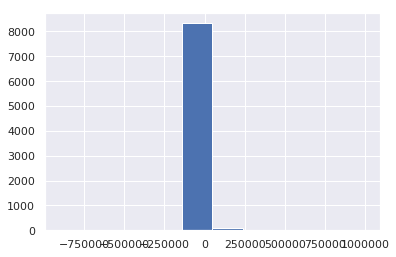

In [231]:
cleanphddata_df['Overall Pay'].hist()

0.0   -900000.0
0.1     14000.0
0.2     17900.0
0.3     20500.0
0.4     23000.0
0.5     25000.0
0.6     27418.6
0.7     29842.7
0.8     31647.0
0.9     35000.0
1.0    994000.0
Name: Overall Pay, dtype: float64

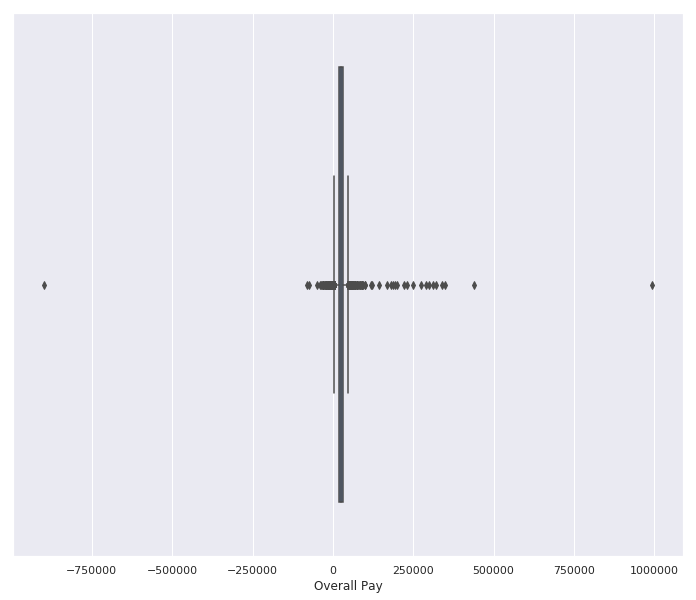

In [232]:
plt.figure(figsize = (12, 10))
sns.boxplot(cleanphddata_df['Overall Pay'])

cleanphddata_df['Overall Pay'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Removing outliers

In [233]:


# np.where(cleanphddata_df['Overall Pay'] < 35000.0, 35000.0,cleanphddata_df['Overall Pay'])

cleanphddata_df['Overall Pay'].where(cleanphddata_df['Overall Pay'] > 14000.0, inplace = True, try_cast=False)
cleanphddata_df['Overall Pay'].where(cleanphddata_df['Overall Pay'] < 35000.0, inplace = True, try_cast=False)
cleanphddata_df['Overall Pay'].isnull().count()

# cleanphddata_df['Overall Pay']
# cleanphddata_df['Overall Pay']= np.where(cleanphddata_df['Overall Pay'] > 14000.0, 14000.0,cleanphddata_df['Overall Pay'])

/home/shipra/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


8428

# distribution of Pay across Departments (all Universities)

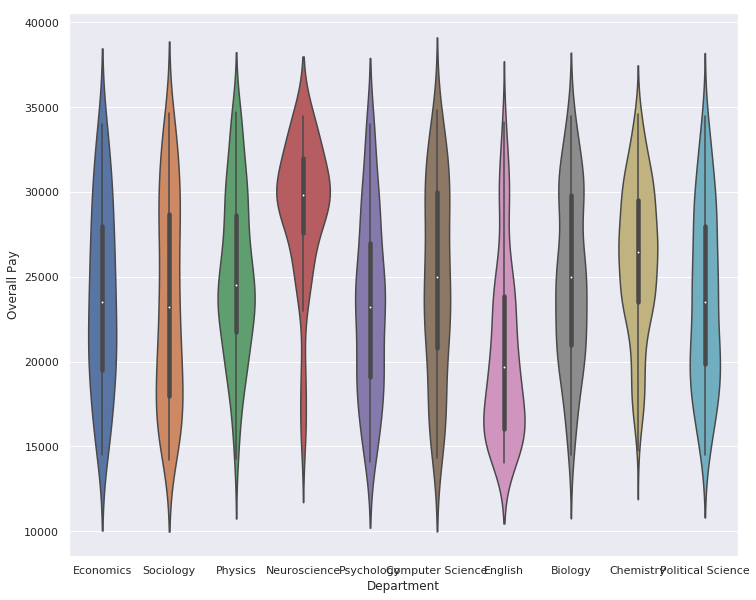

In [178]:
departments = cleanphddata_df[(cleanphddata_df['Department'].isin(['Chemistry','English','Psychology','Sociology','Political Science','Physics','Biology','Computer Science','Economics','Neuroscience']))]
departments

plt.figure(figsize = (12, 10))
sns.violinplot(x="Department", y="Overall Pay", data=departments)


# Universities contributed maximum data

In [181]:
universities2 = cleanphddata_df.groupby('University')['Overall Pay'].agg('count')
universities2.drop_duplicates()
universities2

morethan20 = universities2.loc[universities2>19].sort_values(ascending=False)
morethan20



University
Duke University (DU)                                 146
University of North Carolina - Chapel Hill (UNC)     132
University of Michigan - Ann Arbor (UM)              124
University of Wisconsin - Madison (UW)               112
University of Southern California (USC)              108
University of Minnesota - Twin Cities (UM)           101
University of California - San Diego (UCSD)          101
University of Illinois - Urbana- Champaign (UIUC)    101
University of Pennsylvania                            99
Emory University                                      98
University of Texas - Austin (UT)                     97
Pennsylvania State University (Penn State)            96
University of California - Berkeley                   96
University of California - Los Angeles (UCLA)         93
Georgia Institute of Technology (Georgia Tech)        92
Northwestern University (NU)                          90
University of Chicago (UC)                            84
University of Virgin

### top 10 Universities with highest data points

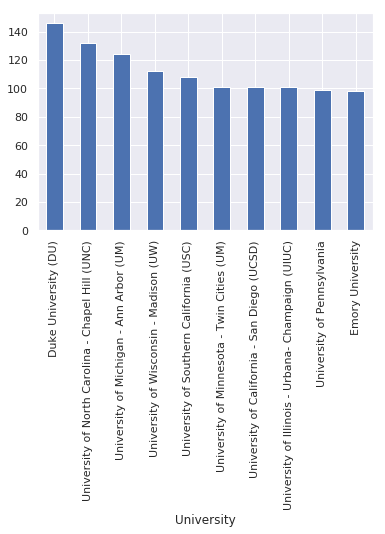

In [182]:
morethan20.head(10).plot(kind='bar')

# Exploring Duke University : Maximum data contributor

Text(0, 0.5, 'No. of data from each department')

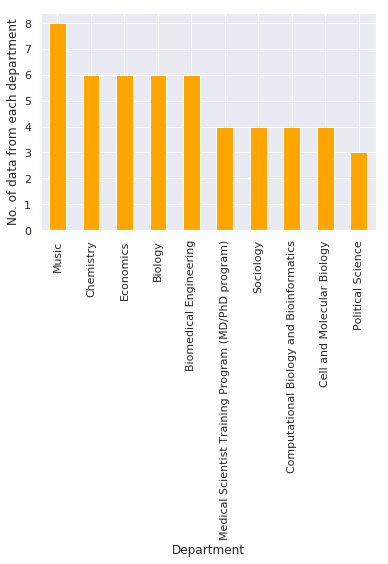

In [234]:
DU = cleanphddata_df[copy_cleanphddata_df.University == 'Duke University (DU)']

## Some pay amounts are negetive. As the value is not significantly different, I am converting negetive to positive

DU.groupby('Department')['Overall Pay'].agg('count').sort_values(ascending=False).head(10).plot(kind='bar', color = "orange")
plt.ylabel("No. of data from each department")


Text(0, 0.5, 'Overall Pay')

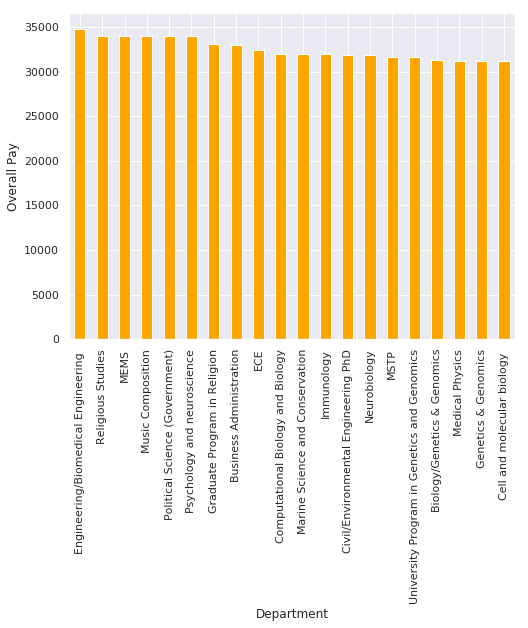

In [235]:
# Average pay across departments in DU

plt.figure(figsize = (8, 6))
DU.groupby('Department')['Overall Pay'].agg('mean').sort_values(ascending=False).head(20).plot(kind='bar', color = "orange")
plt.ylabel("Overall Pay")


# there are some negetive values in Overall pay. Also outliers can be justified.....needs further data cleaning


### Change in Pay in DU / all universities across academic years

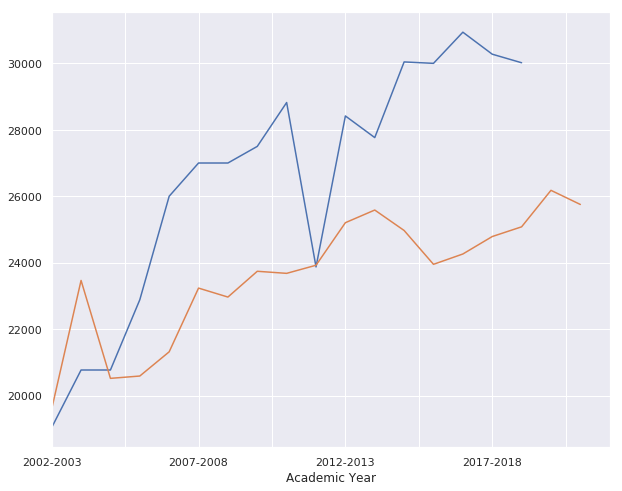

In [237]:
plt.figure(figsize = (10, 8))

DU.groupby('Academic Year')['Overall Pay'].agg('mean').plot(label = "DU")

cleanphddata_df.groupby('Academic Year')['Overall Pay'].agg('mean').plot(label = "All Universities")

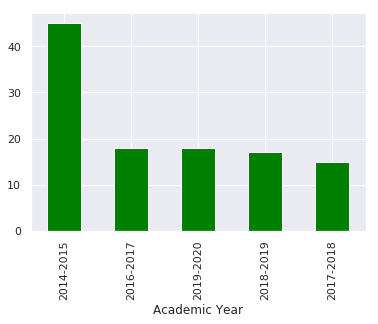

In [238]:
## Maximum no. of data points were collected in 2014-2015 academic session

DU.groupby('Academic Year')['Overall Pay'].agg('count').sort_values(ascending=False).head(5).plot(kind='bar', color = "green")

### Most no. of data has come in academic year 2014-2015. let's explore this a little more

In [202]:
DU['Overall Pay'].mean()

28816.63698630137

In [203]:
## making a sub data set for 2014 - 2015 

DU2014 = DU[DU['Academic Year'] == '2014-2015']

DU2014[['Overall Pay','LW Ratio','12 M Gross Pay','Program Year']].reset_index().head()


,index,Overall Pay,LW Ratio,12 M Gross Pay,Program Year
0,4779,29420.0,1.56,29420.0,1st
1,6799,30000.0,1.60,30000.0,2nd
2,8146,29412.0,1.56,29412.0,6th and up
3,8155,21000.0,1.12,NaN,3rd
4,8213,NaN,0.74,NaN,4th


In [208]:
DU2014.groupby('Program Year')['Overall Pay'].agg('count')


# DU2014.groupby('Program Year')['Overall Pay'].agg('mean').sort_values().plot(kind='bar', color = "yellow")

Program Year
1st           19
2nd           10
3rd            4
4th            5
5th            1
6th and up     4
Name: Overall Pay, dtype: int64

In [207]:
DU2014.groupby('Department')['Overall Pay'].agg('count').sort_values(ascending=False).head(10)

Department
Economics                                   3
Cognitive Neuroscience Admitting Program    3
Music                                       2
Computational Biology and Bioinformatics    2
Biology                                     2
Sociology                                   2
Immunology                                  2
Cell and Molecular Biology                  2
Pharmacology and Cancer Biology             2
Chemistry                                   2
Name: Overall Pay, dtype: int64

In [193]:
DU2014.isnull().sum()
DU2014.shape

(51, 11)

Text(0.5, 1.0, 'Across all years')

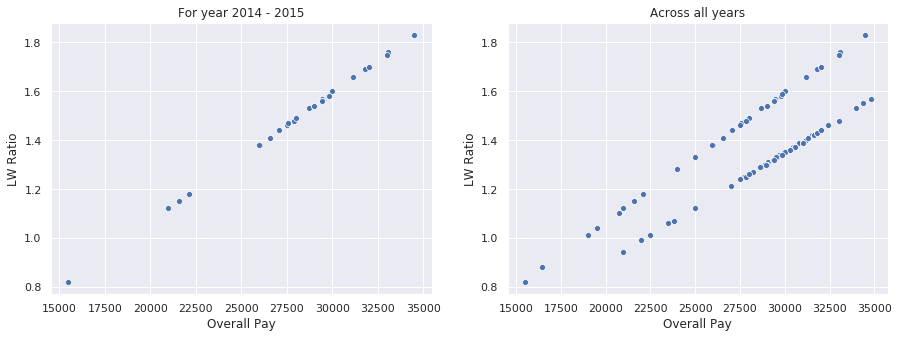

In [194]:
sns.set(style='darkgrid')
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x=DU2014['Overall Pay'], y=DU2014['LW Ratio']).set_title("For year 2014 - 2015")
plt.subplot(122)
sns.scatterplot(x=DU['Overall Pay'], y=DU['LW Ratio']).set_title("Across all years")

/home/shipra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shipra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


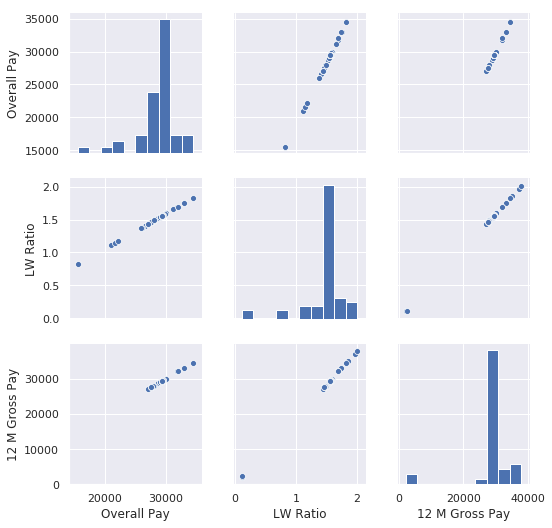

In [195]:
pairDU2014 = DU2014.dropna(subset = ['12 M Gross Pay'])

## pair plot for complete dataset for DU 2014-2015 year

pair_plot = DU2014[['Overall Pay','LW Ratio','12 M Gross Pay']]
sns.pairplot(data = pair_plot)
  

Thank you